In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [18]:
#load the dataset green_tech_data.csv

file_path = 'green_tech_data.csv'
data = pd.read_csv(file_path)

In [19]:
data.head()


,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [20]:
#split the data into training and testting

X = data.drop('sustainability', axis=1)
y = data['sustainability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model= LogisticRegression()

#fit the model

model.fit(X_train, y_train)

LogisticRegression()

In [35]:
#confusion matrix

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

#total samples

print('Total Samples:', len(data))


Total Samples: 100


sustainability
0    85
1    15
Name: count, dtype: int64


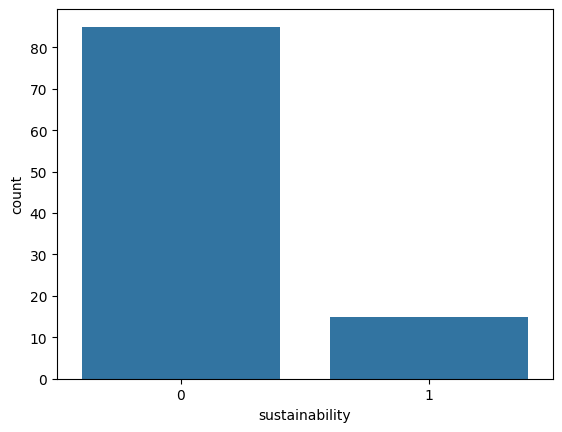

In [27]:
#check if data is balanced or not as we previously did data.head()

# Check for class imbalance
print(data['sustainability'].value_counts()) 
# Visualize class distribution
sns.countplot(x='sustainability', data=data)
plt.show()

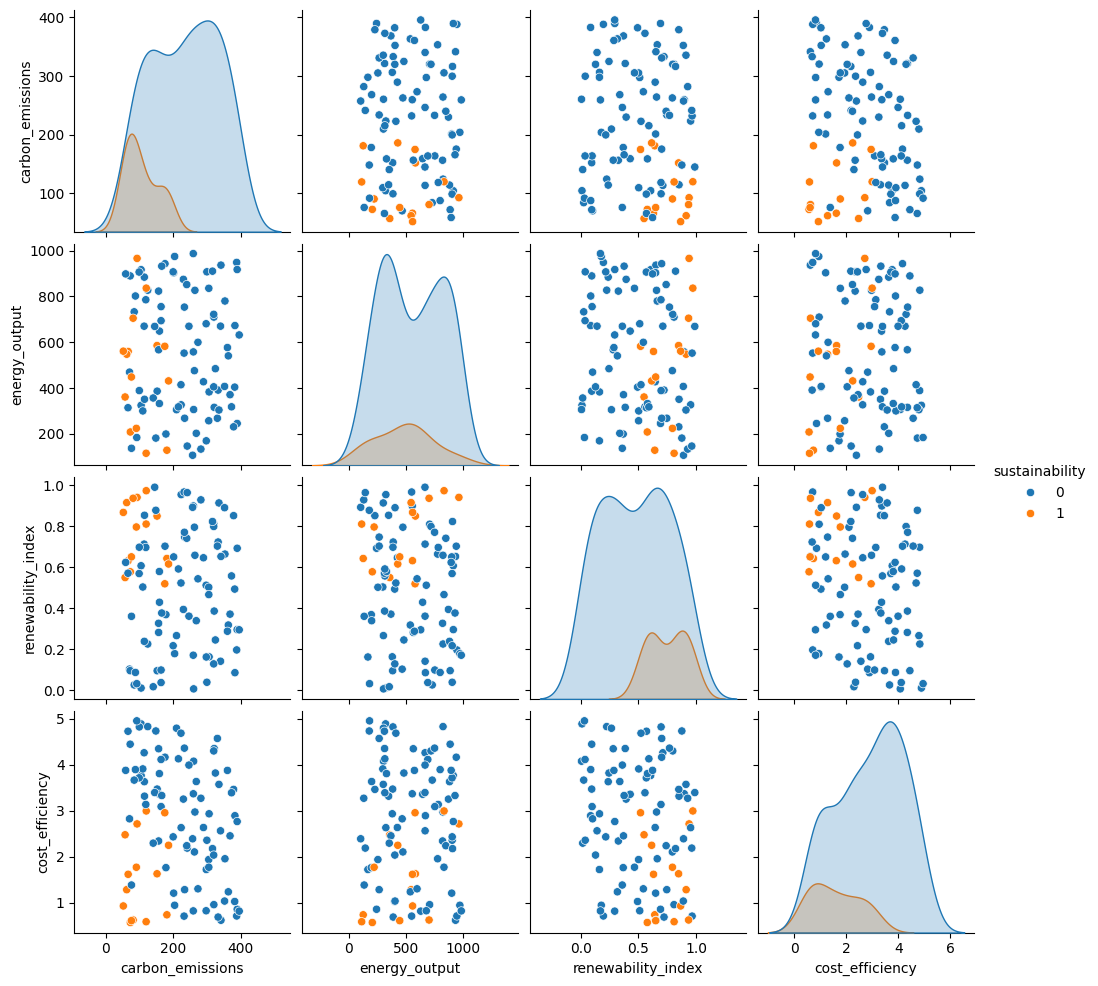

In [28]:
#visualize the data

sns.pairplot(data, hue='sustainability')
plt.show()

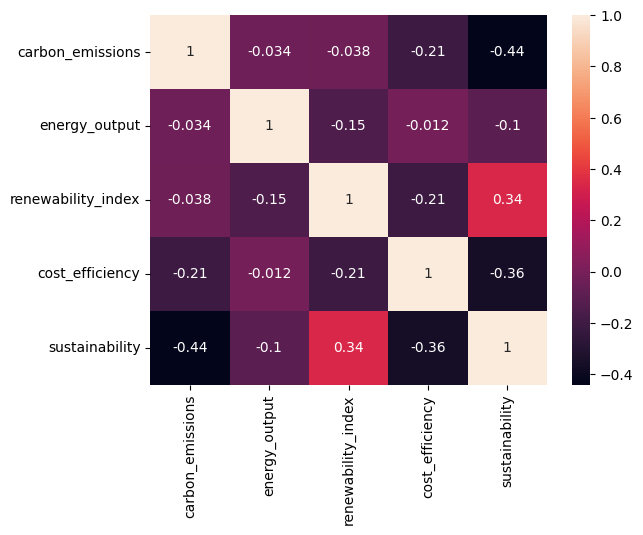

In [23]:
# heatmap

sns.heatmap(data.corr(), annot=True)
plt.show()

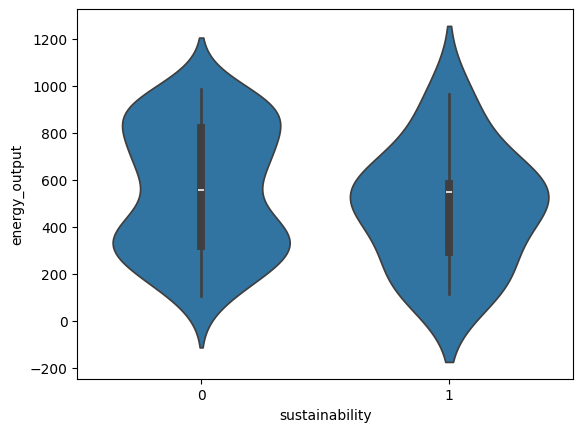

In [30]:
#make violin plots

sns.violinplot(x='sustainability', y='energy_output', data=data)
plt.show()


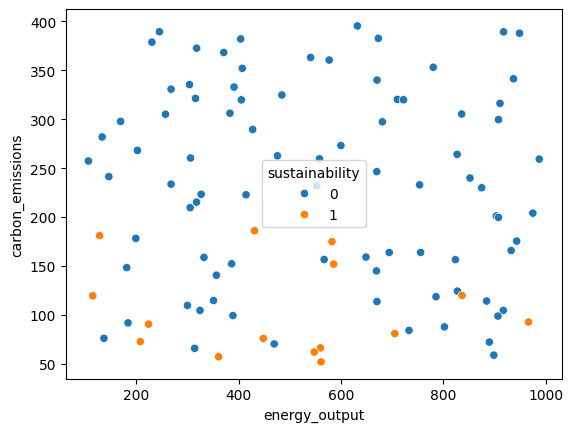

In [32]:
#scatterplot

sns.scatterplot(x='energy_output', y='carbon_emissions', hue='sustainability', data=data)
plt.show()

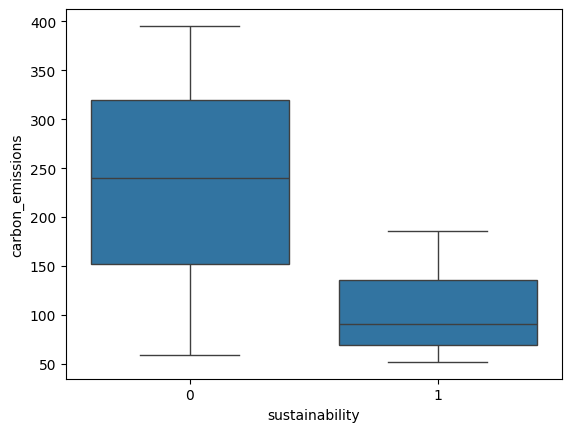

In [33]:
#box plot

sns.boxplot(x='sustainability', y='carbon_emissions', data=data)
plt.show()

In [36]:
#classifaction report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.67      0.80         3

    accuracy                           0.95        20
   macro avg       0.97      0.83      0.89        20
weighted avg       0.95      0.95      0.95        20



In [37]:
#feature importance

feature_importance = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Importance'])
feature_importance.sort_values(by='Importance', ascending=False)


,Importance
renewability_index,1.092184
energy_output,0.001097
carbon_emissions,-0.023347
cost_efficiency,-1.259560


In [38]:
import joblib
#import model to a file

joblib.dump(model, 'green_tech_model.pkl')

['green_tech_model.pkl']

In [39]:
#deployment
new_data = np.array([[22.49,45.33,52.33]])
predictions = model.predict(new_data)
print(predictions)

C:\Users\athar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but LogisticRegression is expecting 4 features as input.